In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output

In [2]:
#Define constants
m = 39.95*1.68*10**(-27)
epsilon = 119.8/1.381*10**(-23)
sigma = 3.405 #angstrom
h = 10**-4 #Timestep, sqrt(m*sigma**2/epsilon)

#Potential function in natural units
def r(x,y):
    r_pos = np.sqrt(x**2+y**2)
    return r_pos

def Grad_potential(x_1, y_1, x_2, y_2):
    direction = np.array([[x_1 - x_2], [y_1 - y_2]])
    r = np.sqrt((x_1 - x_2)**2+(y_1 - y_2)**2)
    U_partial_r = -4*(6*(r)**(-7) - 12*(r)**(-13))
    grad_U = U_partial_r * direction *r**(-1)
    return grad_U

def boxcheck (x, y):
    x_upper_limit = 5.0 #units of sigma
    y_upper_limit = 5.0 #units of sigma
    
    x_lower_limit = 0
    y_lower_limit = 0
    
    l = x_upper_limit - x_lower_limit #length of the box, only works for squares
    
    if x < x_upper_limit and x > x_lower_limit:
        if y < y_upper_limit and y > y_lower_limit:
            return np.array([x, y])
        if y > y_upper_limit:
            return np.array([x, y -l])
        if y < y_lower_limit:
            return np.array([x, y +l])
    if x > x_upper_limit:
        if ( y < y_upper_limit and y > y_lower_limit):
            return np.array([x- l, y])
        if y > y_upper_limit:
            return np.array([x- l, y - l])
        if y < y_lower_limit:
            return np.array([x- l, y + l])
    if x < x_lower_limit:
        if ( y < y_upper_limit and y > y_lower_limit):
            return np.array([x + l, y])
        if y > y_upper_limit:
            return np.array([x + l, y - l])
        if y < y_lower_limit:
            return np.array([x + l, y + l])


        
#Class for argon particles
        
class Particle:
    
    mass = 39.95*1.68*10**(-27)
    def __init__(self, x, y, z, vx, vy, vz):
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
        self.z = z
        self.vz = vz

class Energy:
    def __init__(self, E_tot, E_kin, E_pot):
        self.E_tot = E_tot
        self.E_kin = E_kin
        self.E_pot = E_pot

In [10]:
# Loop to initialize the particles

#Using natural units
n_particles = int(np.size(pos)/6)
L = 5.0 # length of box

particles = []

energy = []
E_kin_initial = np.array([0.0])
E_pot_initial = np.array([0.0])

T = 1 #units epsilon/k_B = 119.8 K, is input of user
#velocity = np.random.normal(0, np.sqrt(T), size=(1, 3))
#N = 3*n_particles #3 dof for every particle
#lambda_scale = np.sqrt((N-1)*3*T/2*E_kin) #E_kin = 0.5*v**2
rho = 1 #input of user, units of sigma**-3, N*m/L^3



# for i in range(n_particles-1):
    
#     x = random.uniform(0, 5.0) #sigma
#     y = random.uniform(0, 5.0) #sigma
#     position = np.array([[x],[y]])

#     vx = np.random.normal(0, np.sqrt(T)) #sqrt(epsilon/m)
#     vy = np.random.normal(0, np.sqrt(T)) #sqrt(epsilon/m)
#     velocity = np.array([[vx],[vy]])
#     #particle = Particle(position[0], position[1], velocity[0], velocity[1])
#     particle = Particle(pos[i,0], pos[i,1], pos[i,2], pos[i,3], pos[i,4], pos[i,5])
#     particles.append(particle)
#     E_kin_initial += 0.5*(vx**2+vy**2)


# energy_initial  = Energy(E_kin_initial+E_pot_initial,E_kin_initial,E_pot_initial)
# energy.append(energy_initial)
    
# particles_array = np.array(particles)
# energy_array = np.array(energy)

In [9]:
#Positions of atoms
L = 1
T = 1


unit_cell = np.array([[0,0,0],[L/2,L/2,0],[L/2,0,L/2],[0,L/2,L/2]])
pos = np.zeros((4,6))

n_particles = int(np.size(pos)/6)

#Number of cells
Nx = 1
Ny = 1
Nz = 1
Step = 0
for i in range(Nx):
    for j in range(Ny):
        for k in range(Nz):
            pos[Step:Step+4,:3] = (unit_cell + np.tile(L*[i,j,k],4).reshape(4,3))
            Velocities = np.zeros((4,3))
            for l in range(int(np.size(unit_cell)/3)):
                vx = np.random.normal(0, np.sqrt(T))
                vy = np.random.normal(0, np.sqrt(T))
                vz = np.random.normal(0, np.sqrt(T))
                Velocities[l,:] = np.array([vx,vy,vz])
                
            
            pos[Step:Step+4,3:] = Velocities
            Step += int(np.size(unit_cell)/3)
            
print(pos)
# print(np.sum(0.5*Velocities[:,:]**2))
# print(Velocities[:,:])


[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
[[ 0.          0.          0.          0.25235122 -0.39904157 -0.97672686]
 [ 0.5         0.5         0.         -0.71736741 -0.12831864 -0.27364774]
 [ 0.5         0.          0.5        -0.04342122 -0.29693407 -1.04341411]
 [ 0.          0.5         0.5         1.44581923 -0.11163483  0.09049113]]


In [10]:
def Force(A_Position,B_Position):
    Sequence_Polarity = np.array(A_Position>B_Position)*2 -1
    Image_Polarity = np.array(np.power((A_Position-B_Position),2)>(L/2)**(2))
    Distances = (Image_Polarity*L-np.abs(A_Position-B_Position))
    Distance = np.sum(np.power(Distances,2))**(0.5)
    Total_Force = 4*(6/(Distance)**(7) - 12/(Distance)**(13))
    Directions = Distances*Sequence_Polarity
    Forces = (Directions/Distance)*Total_Force
    return Forces
    
A_Position = np.array([0.1,0.1,0.1])
B_Position = np.array([0.61,0.61,0.61])
print(Force(A_Position,B_Position))

[190.11226681 190.11226681 190.11226681]


In [6]:
L=5
Timestep = 0.001
Iterations = 200
#pos = L*np.array([[0.1,0.1,1,0.1,0,0],[0.7,0.7,0.7,0,0,0],[1,1,0,0,0,0]])
N_Particles = np.shape(pos)[0]
Dimensions = 3

Historic_Positions = np.zeros((N_Particles,Dimensions,Iterations))
Historic_Velocities = np.zeros((N_Particles,Dimensions,Iterations))
print(np.shape(Historic_Positions))
Positions = pos[:,:3]
Velocities = pos[:,3:]
Historic_Positions[:,:,0] = Positions
Historic_Velocities[:,:,0] = Velocities

Energy = np.zeros((Iterations,3))
# print(Velocities[:,:])
# print(np.sum(0.5*Velocities[:,:]**2))
#kin, pot, total

for t in range(Iterations-1):
    Energy[t,0] = np.sum(0.5*Velocities[:,:]**2)
    Energy[t,1] = np.sum(Forces)
    Energy[t,2] = Energy[t,0] + Energy[t,1]
    print("v",Velocities)
    Forces = np.zeros((N_Particles,Dimensions))
    for i in range(N_Particles):
        for j in range(N_Particles):
            if (i != j):
                Added_Forces = Force(Positions[i,:],Positions[j,:])
                Forces[i] += Added_Forces
                
    Positions = (Historic_Positions[:,:,t] + Velocities*Timestep + Forces*(Timestep**2)/2)%L
    Historic_Positions[:,:,t+1] = Positions
    if (t>0):
        Velocities = Historic_Velocities[:,:,t-1] + (Historic_Forces+Forces)*(Timestep/2)
        Historic_Velocities[:,:,t] = Velocities
    Historic_Forces = Forces
#     plt.scatter(Positions[:,0],Positions[:,1])
#     plt.xlim(0,L)
#     plt.ylim(0,L)
#     plt.show()
#     clear_output(wait=True)
    
    
                
                


NameError: name 'pos' is not defined

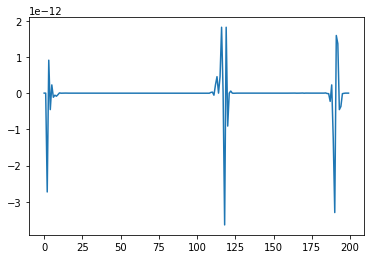

In [71]:
#plt.plot(Energy[:,0])
plt.plot(Energy[:,1])
#plt.plot(Energy[:,2])

<class 'numpy.ndarray'>


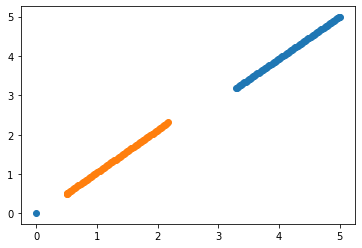

In [63]:
plt.scatter(Historic_Positions[0,0,:],Historic_Positions[0,1,:])
plt.scatter(Historic_Positions[1,0,:],Historic_Positions[1,1,:])
Historic_Positions[:,:,0]

print(type(Historic_Positions))

In [ ]:
"""
timesteps = 10

for i in range(timesteps): #after each step i the particles will move
    #Store the energies per particle
    E_kin_particles = n_particles*[0]
    E_pot_particles = n_particles*[0]

    for j in range(n_particles): #finding the new values of velocity and position for each particle j
        total_acceleration_x = 0
        total_acceleration_y = 0
        

        for k in range(n_particles): #evaluating the net force acting on the particle j from the interacion with all other particles
            if k != j:
                acceleration = Grad_potential(particles_array[j].x[-1], particles_array[j].y[-1], 
                                              (particles_array[j].x[-1] - particles_array[k].x[-1] + L/2) % L - L/2, 
                                              (particles_array[j].y[-1] - particles_array[k].y[-1] + L/2) % L - L/2)
                total_acceleration_x += acceleration[0]
                total_acceleration_y += acceleration[1]
        
        new_x = particles_array[j].x[-1] + particles_array[j].vx[-1]*h + h**2/2*total_acceleration_x
        new_y = particles_array[j].y[-1] + particles_array[j].vy[-1]*h + h**2/2*total_acceleration_y
        
        particles[j].x = np.append(particles_array[j].x, boxcheck(new_x, new_y)[0])
        particles[j].y = np.append(particles_array[j].y, boxcheck(new_x, new_y)[1])

        
        old_total_acceleration_x = 0
        old_total_acceleration_y = 0
        

        for k in range(n_particles): #evaluating the net force acting on the particle j from the interacion with all other particles
            if k != j:
                old_acceleration = Grad_potential(particles_array[j].x[-1], particles_array[j].y[-1], 
                                                  (particles_array[j].x[-1] - particles_array[k].x[-1] + L/2) % L - L/2,
                                                  (particles_array[j].y[-1] - particles_array[k].y[-1] + L/2) % L - L/2)
                old_total_acceleration_x += old_acceleration[0]
                old_total_acceleration_y += old_acceleration[1]            
        
        new_vel_x = particles_array[j].vx[-1] +h/2 * (total_acceleration_x + old_total_acceleration_x)
        new_vel_y = particles_array[j].vy[-1] +h/2 * (total_acceleration_y + old_total_acceleration_y)
        
       # if energy[0].E_kin.[-1] < 0.7 * ((N-1)*3/2*T) or energy[0].E_kin.[-1] > 0.7 * ((N-1)*3/2*T):
        #    new_vel_x = np.sqrt((N-1)*3*T/2*energy[0].E_kin.[-1])*new_vel_x
         #   new_vel_y = np.sqrt((N-1)*3*T/2*energy[0].E_kin.[-1])*new_vel_y
          #  p = j
            
            
        particles[j].vx = np.append(particles_array[j].vx, new_vel_x)
        particles[j].vy = np.append(particles_array[j].vy, new_vel_y)


        #Determine the different energies per particle
        E_kin_particles[j]=(0.5*(new_vel_x[0]**2+new_vel_y[0]**2))
        E_pot_particles[j]=(total_acceleration_x[0]+total_acceleration_y[0])

    #sum the energies of all particles to get the total energies
    E_kin_new = sum(E_kin_particles)
    E_pot_new = sum(E_pot_particles)
    E_tot_new = E_kin_new + E_pot_new
    
    energy[0].E_kin = np.append(energy_array[0].E_kin, E_kin_new)   
    energy[0].E_tot = np.append(energy_array[0].E_tot, E_tot_new)
    energy[0].E_pot = np.append(energy_array[0].E_pot, E_pot_new)
"""

In [ ]:
# for i in range(n_particles):
#     plt.plot(particles_array[i].x, particles_array[i].y)
# plt.title("Positions of particles")
# plt.xlabel("x position ($\sigma$)")
# plt.ylabel("y position ($\sigma$)")
# plt.xlim(0,L)
# plt.ylim(0,L)

In [ ]:
# plt.plot(np.arange(timesteps+1), energy_array[0].E_kin, label = 'Kinetic energy')
# plt.plot(np.arange(timesteps+1), energy_array[0].E_pot, label = 'Potential energy')
# plt.plot(np.arange(timesteps+1), energy_array[0].E_tot, label = 'Total energy')
# plt.title("Energy of the total system")
# plt.xlabel("Timestep")
# plt.ylabel("Energy ($\epsilon$)")
# plt.legend()
# plt.show()